# ***Facial Emotion Recognition***

## ***Mount Google Drive***



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***Print TensorFlow version***




In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## ***Import necessary libraries***

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import cv2

## ***List of image files***

In [4]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/images'):
     for filename in filenames:                    #traverse through the directory '/images' and its subdirectories,
         print(os.path.join(dirname, filename))    #printing the full path of each file encountered.

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/images/validation/neutral/217.jpg
/content/drive/MyDrive/images/validation/neutral/5976.jpg
/content/drive/MyDrive/images/validation/neutral/35229.jpg
/content/drive/MyDrive/images/validation/neutral/10346.jpg
/content/drive/MyDrive/images/validation/neutral/28842.jpg
/content/drive/MyDrive/images/validation/neutral/21377.jpg
/content/drive/MyDrive/images/validation/neutral/35241.jpg
/content/drive/MyDrive/images/validation/neutral/28642.jpg
/content/drive/MyDrive/images/validation/neutral/22123.jpg
/content/drive/MyDrive/images/validation/neutral/15293.jpg
/content/drive/MyDrive/images/validation/neutral/31483.jpg
/content/drive/MyDrive/images/validation/neutral/4328.jpg
/content/drive/MyDrive/images/validation/neutral/5687.jpg
/content/drive/MyDrive/images/validation/neutral/6236.jpg
/content/drive/MyDrive/images/validation/neutral/10048.jpg
/content/drive/MyDrive/images/validation/neutral/15405.jpg
/content/dr

## ***Set the random seed***

In [5]:
tf.random.set_seed(23)

## ***Listing Classes in Training and Validation Data Directories***

In [6]:
data_dir = '/content/drive/MyDrive/images'
print(os.listdir(data_dir))
classes_train = os.listdir(data_dir + "/train") #This line creates a list called classes_train and populates it with the names of the directories (representing classes) found within the images/train subdirectory.
classes_valid = os.listdir(data_dir + "/validation")
print(f'Train Classes - {classes_train}')
print(f'Validation Classes - {classes_valid}')

['.DS_Store', 'train', 'validation']
Train Classes - ['.DS_Store', 'disgust', 'angry', 'neutral', 'surprise', 'happy', 'fear', 'sad']
Validation Classes - ['.DS_Store', 'angry', 'neutral', 'disgust', 'sad', 'happy', 'surprise', 'fear']


## ***Path Objects Initialization***

In [7]:
# Creating the Pathlib PATH objects
train_path = Path("/train")
valid_path = Path("/validation")

## ***Main Dataset Paths Initialization***

In [8]:
train_dataset_main = data_dir + "/train"        # these more but same paths i made as create_dataset function below wasn't working
valid_dataset_main = data_dir + "/validation"  # properly with train_path and valid_path

## ***Function to Create Dataset DataFrame***








In [9]:
def create_dataset_df(main_path, dataset_name):
    print(f"{dataset_name} is being created ...")
    df = {"img_path":[],"class_names":[]}
    for class_names in os.listdir(main_path):
            for img_path in glob.glob(f"{main_path}/{class_names}/*"):
                df["img_path"].append(img_path)
                df["class_names"].append(class_names)
    df = pd.DataFrame(df)
    print(f"{dataset_name} has been created!")
    return df

## ***Creating DataFrame for Training Dataset***

In [10]:
train_df = create_dataset_df(train_dataset_main, "Train dataset")

Train dataset is being created ...
Train dataset has been created!


## ***Creating DataFrame for Validation Dataset***

In [11]:
valid_df=create_dataset_df(valid_dataset_main, "Validation dataset")

Validation dataset is being created ...
Validation dataset has been created!


## ***Sampling 5 Entries from Training Dataset DataFrame***

In [12]:
train_df.sample(5)

,img_path,class_names
561,/content/drive/MyDrive/images/train/angry/4756...,angry
582,/content/drive/MyDrive/images/train/angry/8432...,angry
7112,/content/drive/MyDrive/images/train/neutral/32...,neutral
2692,/content/drive/MyDrive/images/train/angry/2233...,angry
10383,/content/drive/MyDrive/images/train/surprise/5...,surprise


## ***Sampling 5 Entries from Validation Dataset DataFrame***

In [13]:
valid_df.sample(5)

,img_path,class_names
243,/content/drive/MyDrive/images/validation/angry...,angry
3397,/content/drive/MyDrive/images/validation/sad/2...,sad
1019,/content/drive/MyDrive/images/validation/neutr...,neutral
3355,/content/drive/MyDrive/images/validation/sad/4...,sad
4156,/content/drive/MyDrive/images/validation/happy...,happy


In [14]:
print(f"training samples: {len(train_df)} \nvalidation samples: {len(valid_df)}")

training samples: 29088 
validation samples: 7101


## ***Visualizing Class Distribution in Training and Validation Datasets***

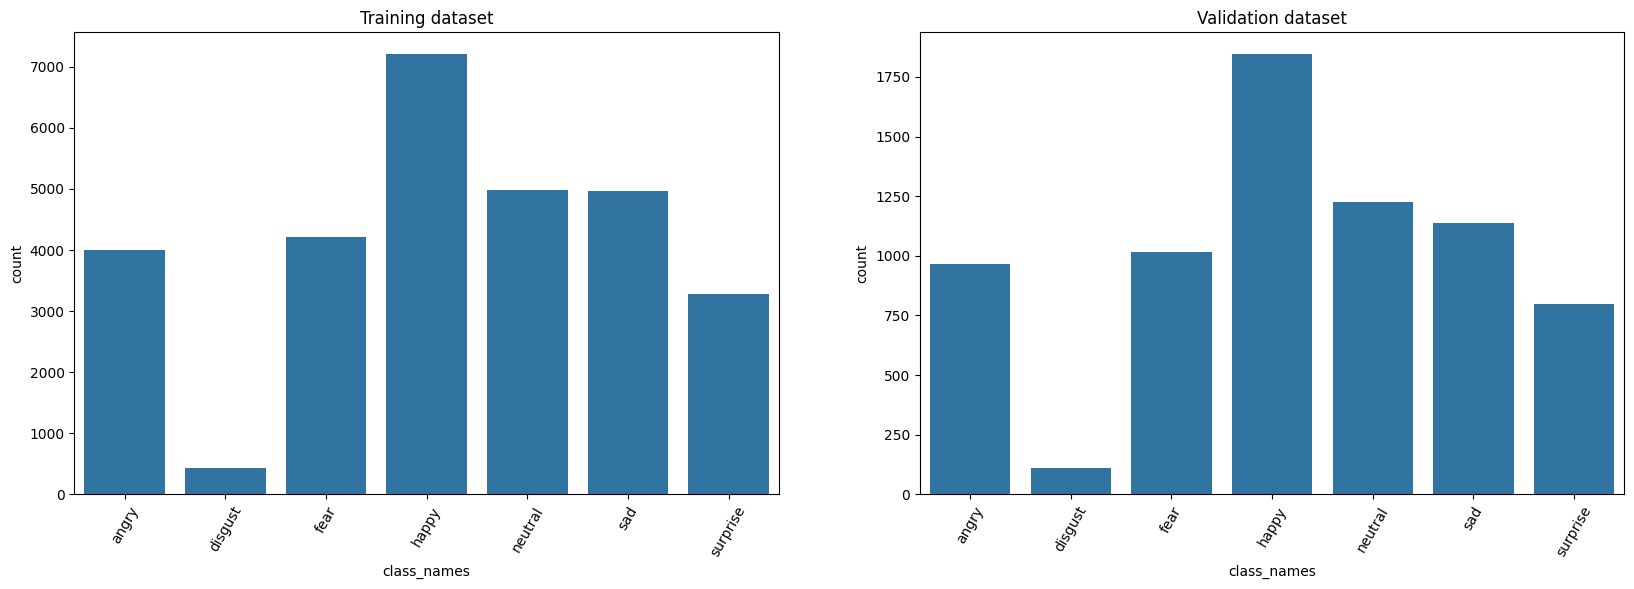

In [15]:
plt.figure(figsize=(20,6))
# train dataset
plt.subplot(1,2,1)
sns.countplot(data=train_df.sort_values("class_names"),x="class_names")
plt.title("Training dataset")
plt.xticks(rotation = 60)
# validation dataset
plt.subplot(1,2,2)
sns.countplot(data=valid_df.sort_values("class_names"),x="class_names")
plt.title("Validation dataset")
plt.xticks(rotation = 60)

plt.show()

## ***Encoding Class Names in Training Dataset***

In [16]:

from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
train_df["class_names"] = Le.fit_transform(train_df["class_names"])

train_df["class_names"].value_counts()

class_names
3    7204
4    4982
5    4968
2    4220
0    3993
6    3285
1     436
Name: count, dtype: int64

In [17]:
valid_df["class_names"] = Le.transform(valid_df["class_names"])


In [18]:
valid_df["class_names"].value_counts()

class_names
3    1845
4    1226
5    1139
2    1018
0     965
6     797
1     111
Name: count, dtype: int64

## ***Converting Class Labels to Categorical for Training and Validation Datasets***

In [19]:

train_labels = tf.keras.utils.to_categorical(train_df["class_names"])
valid_labels = tf.keras.utils.to_categorical(valid_df["class_names"])


In [20]:
train_labels[:10]

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## ***Computing Class Weights for Imbalanced Classes***

In [21]:

# Compute class weights

classTotals = train_labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

class_weight = {e : weight for e , weight in enumerate(classWeight)}
print(class_weight)

{0: 1.8041573, 1: 16.522936, 2: 1.707109, 3: 1.0, 4: 1.4460056, 5: 1.4500805, 6: 2.1929984}


In [22]:
input_image = cv2.imread(train_df.img_path[0])

input_image.shape

(48, 48, 3)

In [23]:
# Function used for Transformation

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

## ***Image Processing Setup***

In [24]:
# Define IMAGE SIZE and BATCH SIZE
IMG_SIZE = 96
BATCH_SIZE = 64

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.1, -0.05))
])


## ***Dataset Setup***

In [25]:
AUTOTUNE = tf.data.experimental.AUTOTUNE #to find a good allocation of CPU budget across all parameters

def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()

    return dataset

In [26]:
# Creating Train Dataset object and Verifying it

train_dataset = get_dataset(train_df["img_path"], train_labels)

#iter() returns an iterator of the given object
#next() returns the next number in an iterator
image , label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

(64, 96, 96, 3)
(64, 7)


disgust


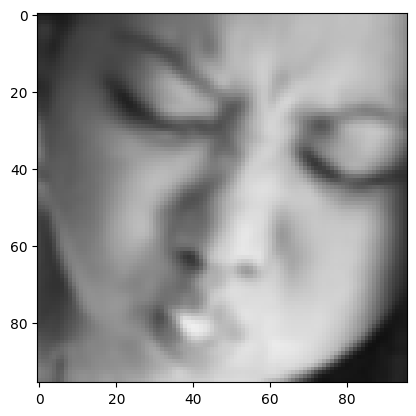

In [27]:
# View a sample Training Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96 , 96 , 3))

In [28]:
val_dataset = get_dataset(valid_df["img_path"] , valid_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)


(64, 96, 96, 3)
(64, 7)


angry


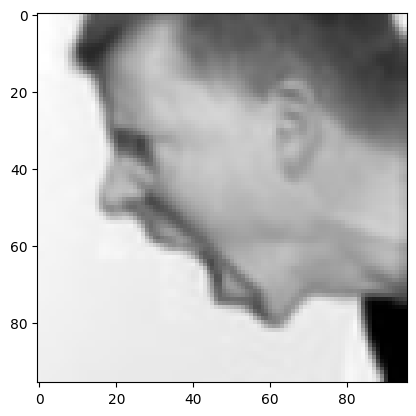

In [29]:
 #View a sample Validation Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96 , 96 , 3))


## ***Model Implementation***

In [30]:

from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()


31790344/31790344 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 3, 3, 1408)        7768569   
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 3, 3, 128)         1622144   
                                                                 
 global_average_pooling2d (  (None, 128)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                       

In [34]:
# Compiling your model by providing the Optimizer , Loss and Metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [35]:
len(train_labels),len(valid_labels)

(29088, 7101)

In [36]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=2,mode="auto")

## ***Model Training***

In [37]:
# Train the model
history = model.fit(
     train_dataset,
     steps_per_epoch=len(train_labels)//BATCH_SIZE,
      epochs=8,
     validation_data=val_dataset,
     validation_steps = len(valid_labels)//BATCH_SIZE,
     class_weight=class_weight
)


Epoch 1/8
454/454 [==============================] - 4263s 9s/step - loss: 1.1080 - accuracy: 0.8294 - precision: 0.8657 - recall: 0.7941 - val_loss: 11.3997 - val_accuracy: 0.1618 - val_precision: 0.1618 - val_recall: 0.1618
Epoch 2/8
454/454 [==============================] - 179s 394ms/step - loss: 1.6542 - accuracy: 0.8261 - precision: 0.8549 - recall: 0.7887 - val_loss: 13.9863 - val_accuracy: 0.1615 - val_precision: 0.1615 - val_recall: 0.1615
Epoch 3/8
454/454 [==============================] - 162s 358ms/step - loss: 1.5711 - accuracy: 0.8208 - precision: 0.8532 - recall: 0.7805 - val_loss: 9.0784 - val_accuracy: 0.1616 - val_precision: 0.1616 - val_recall: 0.1616
Epoch 4/8
454/454 [==============================] - 158s 349ms/step - loss: 1.4489 - accuracy: 0.8188 - precision: 0.8547 - recall: 0.7698 - val_loss: 12.0587 - val_accuracy: 0.1614 - val_precision: 0.1614 - val_recall: 0.1614
Epoch 5/8
454/454 [==============================] - 158s 348ms/step - loss: 1.5882 - accur

In [39]:
import itertools  # Import 'itertools' for iterators and looping
from collections import Counter

In [40]:
evaluation_results = model.evaluate(val_dataset)
print(evaluation_results)

111/111 [==============================] - 24s 195ms/step - loss: 15.9175 - accuracy: 0.1604 - precision: 0.1604 - recall: 0.1604
[15.917534828186035, 0.16039994359016418, 0.16039994359016418, 0.16039994359016418]


In [41]:
outputs = model.predict(val_dataset)
print(outputs)


111/111 [==============================] - 25s 178ms/step
[[8.7235378e-08 5.1970117e-09 3.7123633e-03 ... 6.6396558e-12
  9.9628747e-01 1.8296104e-11]
 [1.5093741e-08 6.5213568e-10 1.9913597e-03 ... 4.2069741e-13
  9.9800867e-01 1.2899062e-12]
 [7.8097449e-09 2.9674227e-10 1.5943927e-03 ... 1.5169563e-13
  9.9840564e-01 4.9316448e-13]
 ...
 [4.0336094e-08 2.0861122e-09 2.8236206e-03 ... 1.9747004e-12
  9.9717629e-01 5.7029117e-12]
 [3.9761535e-08 2.0522908e-09 2.8061168e-03 ... 1.9316376e-12
  9.9719381e-01 5.5580809e-12]
 [7.4610801e-07 6.6338103e-08 7.8924000e-03 ... 1.8947097e-10
  9.9210644e-01 4.5881127e-10]]


In [42]:
model.save("my_model.keras")

In [43]:
from tensorflow.keras.models import load_model

loaded_model = load_model("my_model.keras")

In [47]:
predicted_class = np.argmax(outputs)
print(predicted_class)


40


In [50]:
from tensorflow.keras.preprocessing import image

img_path = "/content/drive/MyDrive/images/validation/sad/21.jpg"
img = image.load_img(img_path, target_size=(96, 96))  # Assuming 224x224 input
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
predictions = loaded_model.predict(img_batch)
predicted_class = np.argmax(predictions)
print(predicted_class)

1/1 [==============================] - 0s 32ms/step
5


In [51]:
print(predicted_class)

5
